In [3]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

E_coli Classification Report: 
              precision    recall  f1-score   support

           N       0.67      0.62      0.64        13
           Y       0.38      0.43      0.40         7

    accuracy                           0.55        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.56      0.55      0.56        20

E_coli Confusion Matrix: 
[[8 5]
 [4 3]]
E_coli Accuracy: 0.55


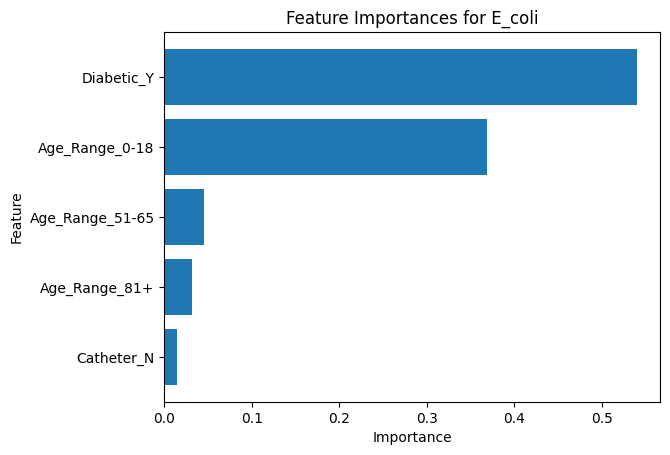

K_pneumoniae Classification Report: 
              precision    recall  f1-score   support

           N       0.75      0.86      0.80        14
           Y       0.50      0.33      0.40         6

    accuracy                           0.70        20
   macro avg       0.62      0.60      0.60        20
weighted avg       0.68      0.70      0.68        20

K_pneumoniae Confusion Matrix: 
[[12  2]
 [ 4  2]]
K_pneumoniae Accuracy: 0.7


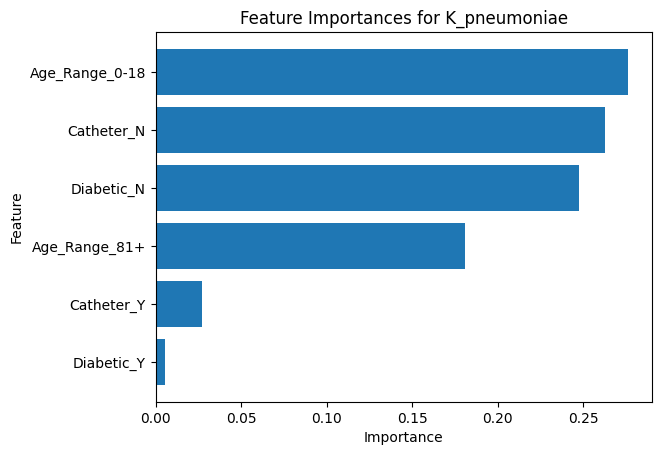

P_mirabilis Classification Report: 
              precision    recall  f1-score   support

           N       0.33      0.11      0.17         9
           Y       0.53      0.82      0.64        11

    accuracy                           0.50        20
   macro avg       0.43      0.46      0.40        20
weighted avg       0.44      0.50      0.43        20

P_mirabilis Confusion Matrix: 
[[1 8]
 [2 9]]
P_mirabilis Accuracy: 0.5


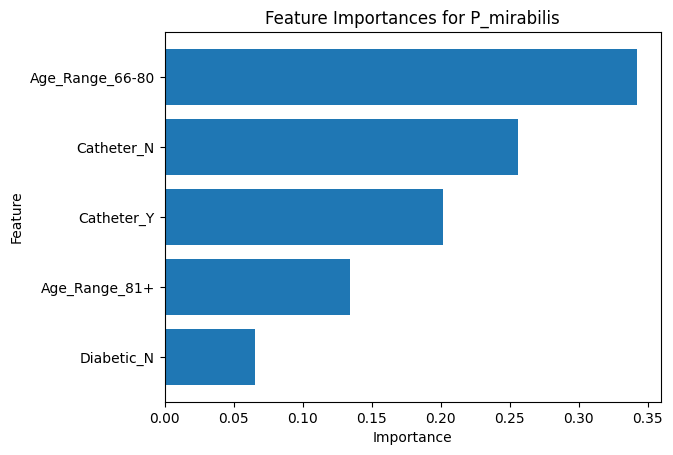

E_faecalis Classification Report: 
              precision    recall  f1-score   support

           N       0.44      0.33      0.38        12
           Y       0.27      0.38      0.32         8

    accuracy                           0.35        20
   macro avg       0.36      0.35      0.35        20
weighted avg       0.38      0.35      0.35        20

E_faecalis Confusion Matrix: 
[[4 8]
 [5 3]]
E_faecalis Accuracy: 0.35


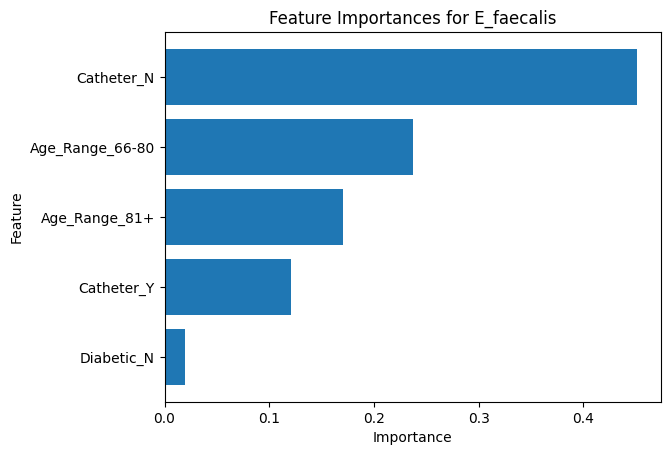

S_saprophyticus Classification Report: 
              precision    recall  f1-score   support

           N       0.44      0.70      0.54        10
           Y       0.25      0.10      0.14        10

    accuracy                           0.40        20
   macro avg       0.34      0.40      0.34        20
weighted avg       0.34      0.40      0.34        20

S_saprophyticus Confusion Matrix: 
[[7 3]
 [9 1]]
S_saprophyticus Accuracy: 0.4


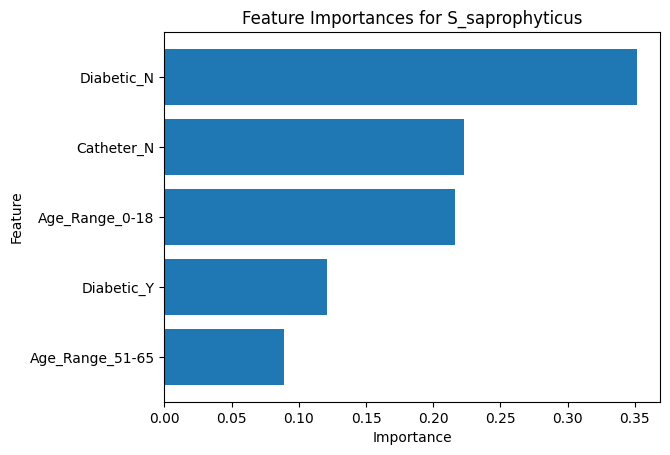

P_aeruginosa Classification Report: 
              precision    recall  f1-score   support

           N       0.40      0.67      0.50         9
           Y       0.40      0.18      0.25        11

    accuracy                           0.40        20
   macro avg       0.40      0.42      0.38        20
weighted avg       0.40      0.40      0.36        20

P_aeruginosa Confusion Matrix: 
[[6 3]
 [9 2]]
P_aeruginosa Accuracy: 0.4


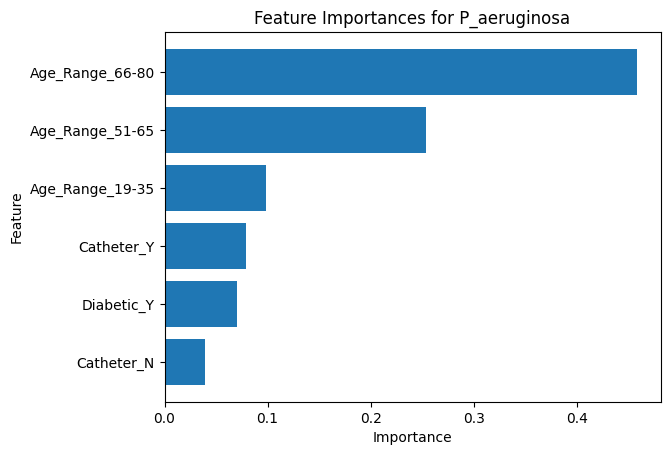

C_albicans Classification Report: 
              precision    recall  f1-score   support

           N       0.62      0.73      0.67        11
           Y       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20

C_albicans Confusion Matrix: 
[[8 3]
 [5 4]]
C_albicans Accuracy: 0.6


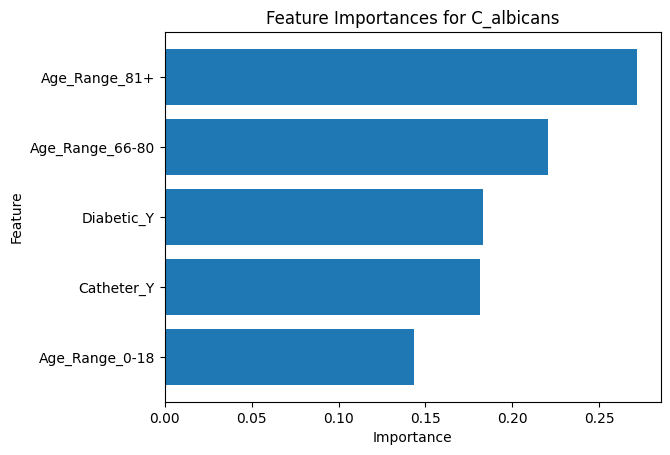

In [ ]:
data = pd.read_csv("fake_patient_data.csv")
columns_of_interest = ['Age_Range', 'Diabetic', 'Catheter']

pathogens = ['E_coli', 'K_pneumoniae', 'P_mirabilis', 'E_faecalis', 'S_saprophyticus', 'P_aeruginosa', 'C_albicans']
X = data[columns_of_interest]

for pathogen in pathogens:
    y = data[pathogen]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    
    # Decision tree model
    pipe = make_pipeline(
        OneHotEncoder(),
        DecisionTreeClassifier(max_depth=3, random_state=13)
    )
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print(pathogen + f" Classification Report: \n{class_report}")
    print(pathogen + f" Confusion Matrix: \n{conf_matrix}")
    print(pathogen + f" Accuracy: {accuracy}")

    feature_importances = model.named_steps['decisiontreeclassifier'].feature_importances_
    feature_names = model.named_steps['onehotencoder'].get_feature_names_out(X_train.columns)
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    importance_df = importance_df[importance_df['Importance'] != 0]

    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for {pathogen}')
    plt.gca().invert_yaxis()
    plt.show()

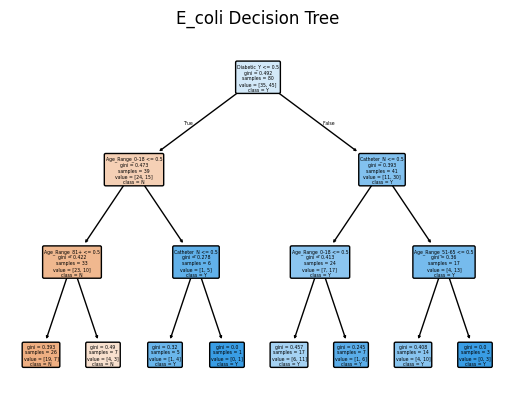

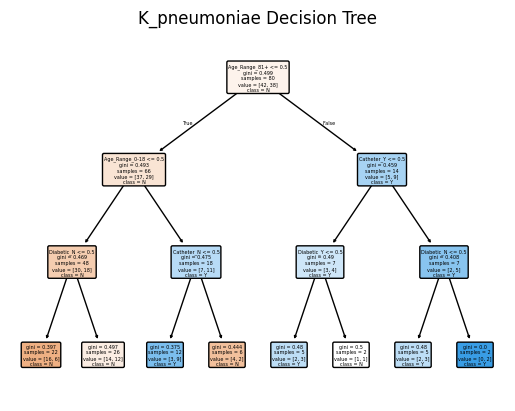

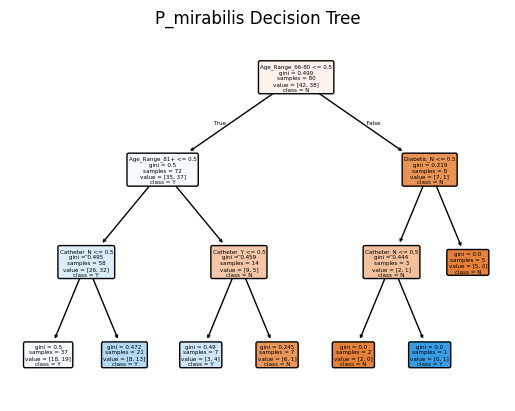

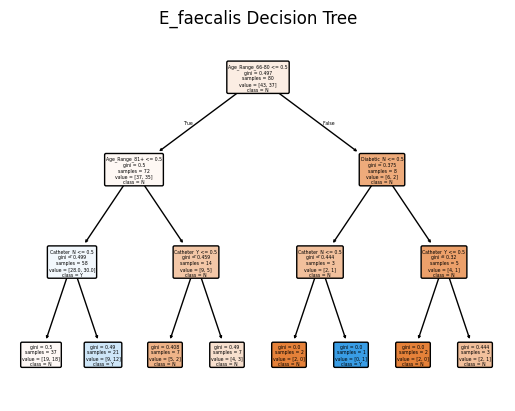

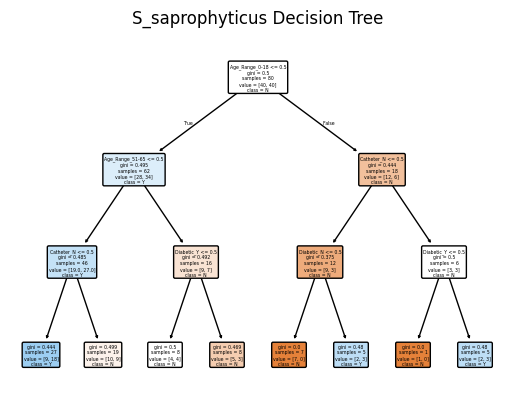

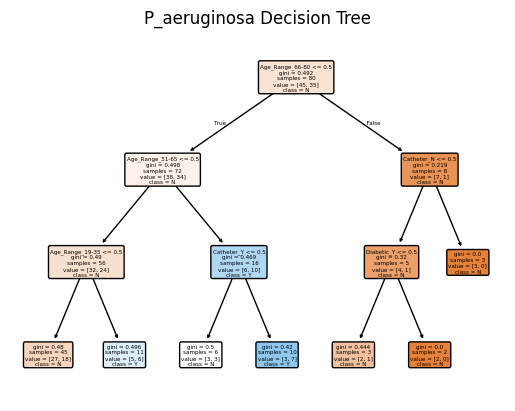

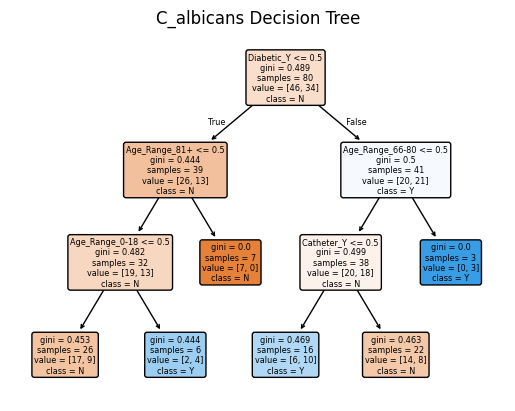

In [21]:
data = pd.read_csv("fake_patient_data.csv")
columns_of_interest = ['Age_Range', 'Diabetic', 'Catheter']

pathogens = ['E_coli', 'K_pneumoniae', 'P_mirabilis', 'E_faecalis', 'S_saprophyticus', 'P_aeruginosa', 'C_albicans']
X = data[columns_of_interest]

for pathogen in pathogens:
    y = data[pathogen]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    
    # Decision tree model
    pipe = make_pipeline(
        OneHotEncoder(),
        DecisionTreeClassifier(max_depth=3, random_state=13)
    )
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    tree = plot_tree(model.named_steps['decisiontreeclassifier'],
            feature_names=feature_names,
            class_names=[str(i) for i in model.classes_],
            filled=True,
            rounded=True,)
    plt.title(pathogen + " Decision Tree")
    plt.show()